# Churn Prediction

Churn prediction is common use case in machine learning domain. If you are not familiar with the term, churn means "leaving the company". It is very critical for business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company. 

In this project, I will use "Telco Customer Churn" data set which is available on Kaggle.

There are 20 featuures (independent variables) and 1 target (dependent) variable for 7043 customers. Target variable indicates if a customer has has left the company (i.e. churn=yes) within the last month. Since the target variable has two states (yes/no or 1/0), this is a binary classification problem.

The variables are:
                                        Classification labels
Churn — Whether the customer churned or not (Yes or No)
                                        Customer services booked
PhoneService — Whether the customer has a phone service (Yes, No)
MultipleLines — Whether the customer has multiple lines (Yes, No, No phone service)
InternetService — Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity — Whether the customer has online security (Yes, No, No internet service)
OnlineBackup — Whether the customer has online backup (Yes, No, No internet service)
DeviceProtection — Whether the customer has device protection (Yes, No, No internet service)
TechSupport — Whether the customer has tech support (Yes, No, No internet service)
StreamingTV — Whether the customer has streaming TV (Yes, No, No internet service)
StreamingMovies — Whether the customer has streaming movies (Yes, No, No internet service)
                                            Customer account information
Tenure — Number of months the customer has stayed with the company
Contract — The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling — Whether the customer has paperless billing (Yes, No)
PaymentMethod — The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges — The amount charged to the customer monthly
TotalCharges — The total amount charged to the customer
                                            Customers demographic info
customerID — Customer ID
Gender — Whether the customer is a male or a female
SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
Partner — Whether the customer has a partner or not (Yes, No)
Dependents — Whether the customer has dependents or not (Yes, No)

At first glance, only customerID seems irrelevant to customer churn. Other variables may or may not have an effect on customer churn. We will figure out.


# DATA COLLECTION

In [1]:
import numpy as np   #importing the libraries for data storing
import pandas as pd

In [2]:
import matplotlib.pyplot as plt  #importing libraries for data plotting
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")   #reading csv file 

# EXPLORARTORY DATA ANALYSIS

In [4]:
df.head()   #by default it shows 20 columns only and 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option('max_columns',None)   #to display all columns
df.head(7)  # to display top 7 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [6]:
df.shape  #returns shape of data frame

(7043, 21)

In [7]:
df.isna().sum() # find number of missing values for each column of the data set

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value in the data set.

In [8]:
df.columns  #returns the name of columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.dtypes #return the data type of each column

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")  #used to change data type of columns TotalCharges

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df.loc[df['TotalCharges'].isnull()==True]  #display the rows which have missing value in TotalCharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df.dropna(subset=['TotalCharges'],inplace=True)   #dropping the rows 

In [15]:
df.shape

(7032, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
df.describe() #returns the statiscal values for the columns who have numeric type of data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df.Churn.value_counts() #count number of each value i.e Yes and No for column Churn

No     5163
Yes    1869
Name: Churn, dtype: int64

In [19]:
100*df.Churn.value_counts()/len(df.Churn)   #to find % of churned customers.

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

Target variable has imbalanced class distribution. Negative class (Churn=No) is much less than positive class (churn=Yes). Imbalanced class distributions influence the performance of a machine learning model negatively as the model is trained with 74% of non-churned data and 26% of churned data. We will use upsampling or downsampling to overcome this issue. 

It is always beneficial to explore the features (independent variables) before trying to build a model. Let's first discover the features that only have two values.

In [20]:
columns = df.columns
binary_cols = []
#making separate list for features having 2 types of values
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [21]:
binary_cols # categorical features with two classes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

The remaining categorical variables have more than two values (or classes).

In [22]:
# Categorical features with multiple classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

## Binary categorical features

Let's check the class distribution of binary features.

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\devan\anaconda3\lib\si

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

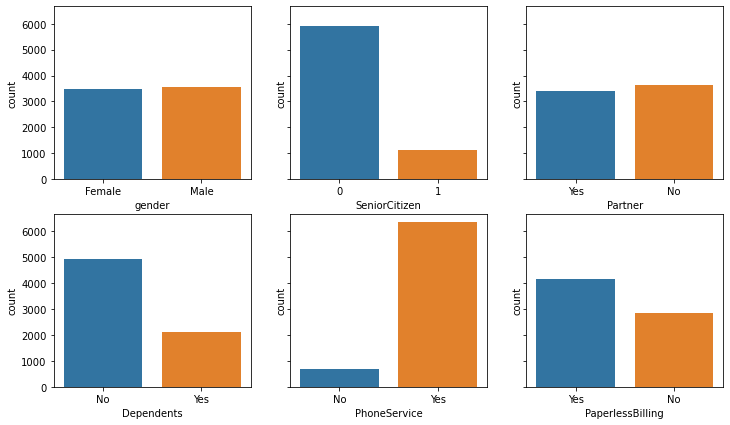

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)  #plotting countplot for binary categorical features

sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

It is better to check how the target variable (churn) changes according to the binary features. To be able to make calculations, we need to change the values of target variable. "Yes" will be 1 and "No" will be 0.

In [24]:
churn_numeric = {'Yes':1, 'No':0}  #changing categorical value into numbers
df.Churn.replace(churn_numeric, inplace=True)


In [25]:
df.dtypes  #churn is now of int type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
df[['gender','Churn']].groupby(['gender']).mean()   #finding average churn rate  wrt the different values of gender

,Churn
gender,
Female,0.269595
Male,0.262046


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

In [27]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


In [28]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329761
Yes,0.197171


In [29]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.155312


In [30]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.250000
Yes,0.267475


In [31]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163757
Yes,0.335893


The other binary features have an effect on the target variable. The phone service may also be skipped if you think 2% difference can be ignored. I have decided to use this feature in the model.

## Other Categorical Features

It is time to explore other categorical features. We also have continuous features such as tenure, monthly charges and total charges which I will discuss in the next part.

There are 6 variables that come with internet service. There variables come into play if customer has internet service.

### Internet Service

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

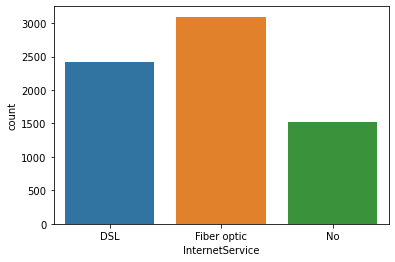

In [32]:
sns.countplot("InternetService", data=df) 

In [33]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [34]:
df[['InternetService','Churn']].groupby('InternetService').mean()   #finding average churn rate wrt diff value of InternetService

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


Internet service variable is definitely important in predicting churn rate. As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection. However, it is not a good way to make assumptions based on only one variable. Let's also check the monthly charges.

In [35]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.088017
Fiber optic,91.500129
No,21.076283


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\devan\anaconda3\lib\si

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

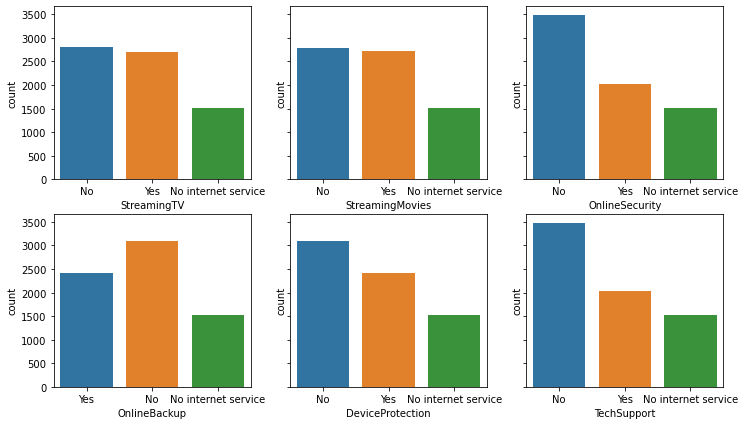

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
#plotting countplot of the features related to the internetservice
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [37]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335351
No internet service,0.074342
Yes,0.301147


In [38]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.337289
No internet service,0.074342
Yes,0.299524


In [39]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417787
No internet service,0.074342
Yes,0.146402


In [40]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399417
No internet service,0.074342
Yes,0.215670


In [41]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391403
No internet service,0.074342
Yes,0.225393


In [42]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416475
No internet service,0.074342
Yes,0.151961


All internet service related features seem to have different churn rates for their classes.

### Phone service

In [43]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [44]:
df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

MultipleLines column includes more specific data compared to PhoneService column as I can understand the number of people who have phone service or not from MultipleLines column also. So, I'll drop the PhoneService column

In [45]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()  

,Churn
MultipleLines,
No,0.250812
No phone service,0.250000
Yes,0.286485


### Contract, Payment Method

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

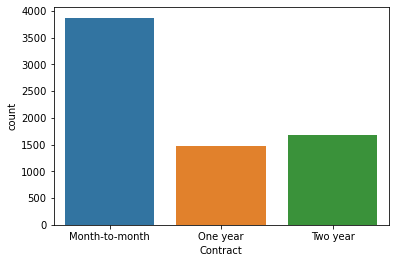

In [46]:
sns.countplot("Contract", data=df)

In [47]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

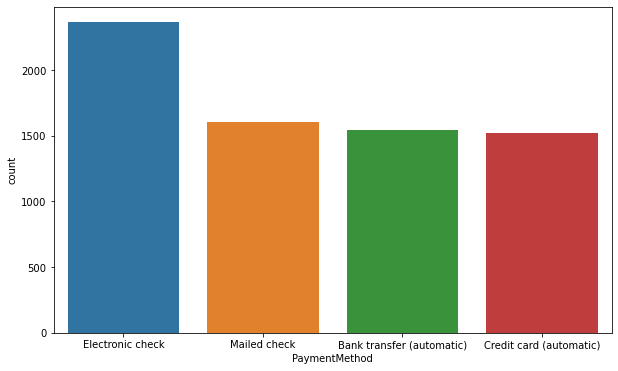

In [48]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

In [49]:
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


### Continuous Variables

The continuous features are tenure, monthly charges and total charges. The amount in total charges columns is proportional to tenure (months) multiplied by monthly charges. So it is unnecessary to include total charges in the model. Adding unnecassary features will increase the model complexity. It is better to have a simpler model when possible.

In [50]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean() 
#finding average tenure and monthlycharge on the basis of churn.

,tenure,MonthlyCharges
Churn,,
0,37.650010,61.307408
1,17.979133,74.441332


It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in months for people who left the company is 20 months less than the average for people who stay. 

It seems like monthly charges also have an effect on churn rate. 

Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company. Let's figure out.

In [51]:
df[['Contract','tenure']].groupby('Contract').mean()  #average tenure wrt type of contract

,tenure
Contract,
Month-to-month,18.036645
One year,42.073370
Two year,57.071810


As expected, contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:
1) Customer ID
2) Gender
3) PhoneService
4) Contract
5) TotalCharges

In [52]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [53]:
df.head(10)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1
5,0,No,No,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,Electronic check,99.65,1
6,0,No,Yes,22,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,Credit card (automatic),89.10,0
7,0,No,No,10,No phone service,DSL,Yes,No,No,No,No,No,No,Mailed check,29.75,0
8,0,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,1
9,0,No,Yes,62,No,DSL,Yes,Yes,No,No,No,No,No,Bank transfer (automatic),56.15,0


In [54]:
df.shape


(7032, 16)

# Data Preprocessing

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [56]:
#Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning
#model this is called encoding.
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features,drop_first=True)  #encoding and saving the data in dataframe named as X


'''Subject       Subject_English  Subject_Hindi
    English         1              0
    Hindi           0             1
    Punjabi          0               0
    Hindi            0               1
    English          1               0
    Punjabi         0                 0'''



'Subject       Subject_English  Subject_Hindi\n    English         1              0\n    Hindi           0             1\n    Punjabi          0               0\n    Hindi            0               1\n    English          1               0\n    Punjabi         0                 0'

In [57]:
#Values of numerical features are rescaled between a range of 0 and 1 because if they are not scaled then values with 
#higher number will be given more importance which will effect the accuracy
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])  #min=1 max=72
b = sc.fit_transform(df[['MonthlyCharges']])  #min=18 #max=118


In [58]:
X['tenure'] = a     
X['MonthlyCharges'] = b
#transformed value which was kept in a and b are again placed in dataframe

In [59]:
X.shape

(7032, 26)

In [60]:
X.head()


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0.464789,0.385075,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.014085,0.354229,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.619718,0.239303,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0.014085,0.521891,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# Resampling

As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired for machine learning models. I will use upsampling which means increasing the number of samples of that class which has less samples by randomly selecting rows from it.

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

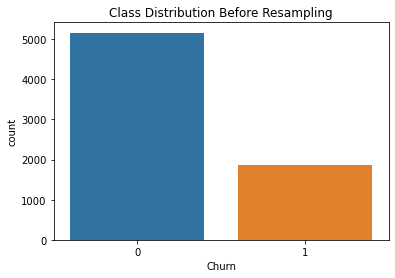

In [61]:
sns.countplot('Churn', data=X).set_title('Class Distribution Before Resampling')

In [62]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [63]:
print(len(X_no),len(X_yes))

5163 1869


In [64]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5163


In [65]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

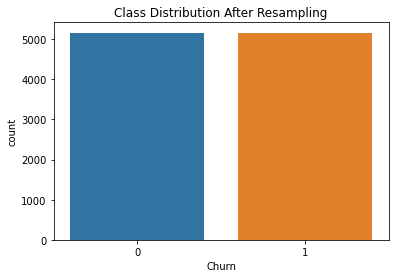

In [66]:
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

# ML model

We need to divide the data set into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Ridge Classifier

I have decided to use ridge classifier as a base model. Then I will try a model that I think will perform better.

In [70]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [71]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [72]:
pred = clf_ridge.predict(X_train)  #make predictions on training set

In [73]:
accuracy_score(y_train, pred) #accuracy on training set

0.7599273607748184

In [74]:
confusion_matrix(y_train, pred)

array([[3028, 1071],
       [ 912, 3249]], dtype=int64)

In [75]:
pred_test = clf_ridge.predict(X_test)

In [76]:
accuracy_score(y_test, pred_test)

0.7633107454017425

The model achieved 75% accuracy on training set and 76% accuracy on test set. The model is not overfitting because accuracies on training and test sets are pretty close. However, 75% accuracy is not very good so we will try to get a better accuracy using a different model.

### Random Forests

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [78]:
clf_forest = RandomForestClassifier(n_estimators=101, max_depth=10)  #101 subsets and max depth is 10

In [79]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=101)

In [80]:
pred1 = clf_forest.predict(X_train)

In [81]:
accuracy_score(y_train, pred1)

0.888861985472155

In [82]:
confusion_matrix(y_train, pred1)

array([[3408,  691],
       [ 227, 3934]], dtype=int64)

In [83]:
pred_test1 = clf_forest.predict(X_test)

In [84]:
accuracy_score(y_test, pred_test1)

0.8388189738625363

The accuracy on training set is 5% higher than the accuracy on test set which indicates a slight overfitting. We can decrease the depth of a tree in the forest because as trees get deeper, they tend to be more specific which results in not generalizing well. However, reducing tree depth may also decrease the accuracy. So we need to be careful when optimizing the parameters. We can also increase the number of trees in the forest which will help the model to be more generalized and thus reduce overfitting. Parameter tuning is a very critical part in almost every project.

Another way is to do cross-validation which allows to use every sample in training and test set. 

GridSearchCV makes this process easy to handle. We can both do cross-validation and try different parameters using GridSearchCV.

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = {'n_estimators':[151,201,251,301], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset. At each iteration, 4 subsets are used in training and the other subset is used as test set. When 5 iteration completed, the model used all samples as both training and test samples.

n_jobs parameter is used to select how many processors to use. -1 means using all processors.

In [87]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [151, 201, 251, 301]})

In [88]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 151}

## BEST MODEL USING THE PARAMETERS WE FOUND FROM GRIDSEARCHCV

In [89]:
rf=RandomForestClassifier(n_estimators=301, max_depth=20)

In [90]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=301)

In [91]:
predtest3=rf.predict(X_test)

In [92]:
accuracy_score(y_test,predtest3)

0.9022265246853823

We have achieved an overall accuracy of almost 90%. This is the mean cross-validated score of the best_estimator. In the previous random forest, the mean score was approximately 86% (88% on training and 84% on test). Using GridSearchCV, we improved the model accuracy by 4%.

## How to improve

We can always try to improve the model. The fuel of machine learning models is data so if we can collect more data, it is always helpful in improving the model. We can also try a wider range of parameters in GridSearchCV because a little adjustment in a parameter may slighlty increase the model.

Finally, we can try more robust or advanced models. Please keep in mind that there will be a trade-off when making such kind of decisions. Advanced models may increase the accuracy but they require more data and more computing power. So it comes down to business decision.